In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Data Biaya Parkiran.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[   19  5000]
 [   35  7000]
 [   26  5000]
 [   27  5000]
 [   19  6000]
 [   27  8000]
 [   27  4000]
 [   32  9000]
 [   25  3000]
 [   35  5000]
 [   26  8000]
 [   26  5000]
 [   20  6000]
 [   32  8000]
 [   18 82000]
 [   29  8000]
 [   47  5000]
 [   45  6000]
 [   46  7000]]


In [4]:
print(y)

[0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[  47 5000]
 [  27 4000]
 [  19 6000]
 [  26 5000]
 [  27 8000]
 [  32 8000]
 [  35 5000]
 [  32 9000]
 [  45 6000]
 [  26 5000]
 [  27 5000]
 [  19 5000]
 [  29 8000]
 [  20 6000]]


In [7]:
print(x_test)

[[   26  8000]
 [   35  7000]
 [   25  3000]
 [   46  7000]
 [   18 82000]]


In [8]:
print(y_train)

[1 1 0 0 1 0 0 1 1 0 0 0 0 0]


In [9]:
print(y_test)

[0 1 0 1 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc. transform(x_test)

In [11]:
print(x_train)

[[ 2.149452   -0.720854  ]
 [-0.28717375 -1.39365106]
 [-1.26182405 -0.04805693]
 [-0.40900504 -0.720854  ]
 [-0.28717375  1.29753719]
 [ 0.32198269  1.29753719]
 [ 0.68747655 -0.720854  ]
 [ 0.32198269  1.97033426]
 [ 1.90578942 -0.04805693]
 [-0.40900504 -0.720854  ]
 [-0.28717375 -0.720854  ]
 [-1.26182405 -0.720854  ]
 [-0.04351117  1.29753719]
 [-1.13999276 -0.04805693]]


In [12]:
print(x_test)

[[-0.40900504  1.29753719]
 [ 0.68747655  0.62474013]
 [-0.53083632 -2.06644812]
 [ 2.02762071  0.62474013]
 [-1.38365533 51.08451992]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 1]
 [0 2]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


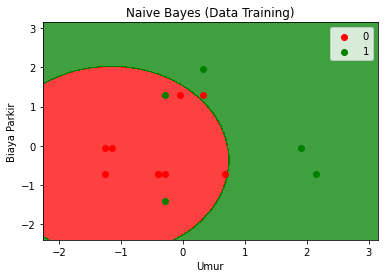

In [22]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Biaya Parkir')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


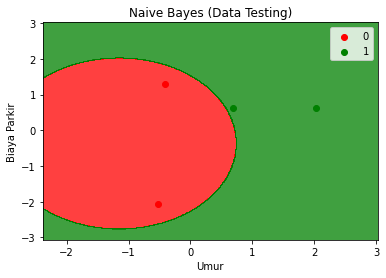

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Biaya Parkir')
plt.legend()
plt.show()